In [5]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

线性回归

In [6]:
def synthetic_data(w, b, num_examples):  
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [7]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.7290, -0.1504],
        [-1.2491, -0.1314],
        [ 1.4906,  2.3669],
        [-0.7002,  0.1327],
        [-0.6278,  1.4094],
        [ 0.2514,  0.2316],
        [-0.1766, -1.9208],
        [ 0.2483, -0.1109],
        [ 1.8048,  1.0397],
        [-0.1385, -0.5952]]) 
 tensor([[ 6.1714],
        [ 2.1571],
        [-0.8698],
        [ 2.3502],
        [-1.8528],
        [ 3.9276],
        [10.3813],
        [ 5.0815],
        [ 4.2849],
        [ 5.9420]])


In [9]:
def linreg(X, w, b):  
    """线性回归模型。"""
    return torch.matmul(X, w) + b

In [10]:
def squared_loss(y_hat, y):  
    """均方损失。"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [11]:
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降。"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [12]:
print(f'w的估计: {true_w}')
print(f'b的估计: {true_b }')

w的估计: tensor([ 2.0000, -3.4000])
b的估计: 4.2


l1 norm of w: 0.347604900598526


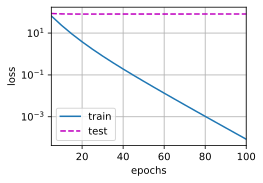

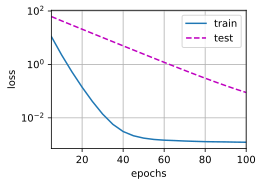

In [3]:
#写出一个从张量开始实现的线性回归函数 首先定义一个y=2x1+3x2+4的线性回归模型 然后生成一个由1000个随机数构成的数据集 其中每个随机数包含从标准正态分布中采样的两个特征x1和x2 以及一个遵循均值为0和标准差为0.01的正态分布的噪声项
#最后将权重w设置为[2,3]和偏置b设置为4
#生成数据集
#再利用生成的随机数训练模型，得到拟合的权重和偏置
#最后比较学到的参数和真实参数

import torch
from torch import nn
from d2l import torch as d2l

n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                      d2l.evaluate_loss(net, test_iter, loss)))
    print('l1 norm of w:', torch.norm(w).item())

train(lambd=0)

train(lambd=3)





L2 norm of w: 0.38098669052124023


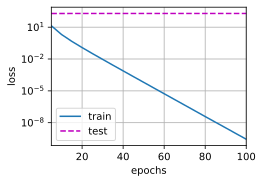

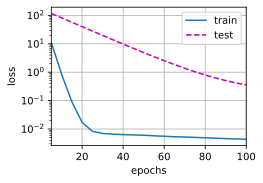

In [2]:
#简洁实现
#使用weight_decay超参数来指定权重衰减超参数
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([{
        "params": net[0].weight,
        'weight_decay': wd}, {
            "params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(X), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                      d2l.evaluate_loss(net, test_iter, loss)))
    print('L2 norm of w:', net[0].weight.norm().item())

train_concise(0)

train_concise(3)